<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is meant to illustrate the 10-armed Bandit Testbed described in Chapter 2 of RL by Sutton and Barto.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        # True action values
        self.q_true = np.random.normal(0, 1, self.n_arms)
        self.best_action = np.argmax(self.q_true)

    def get_reward(self, action):
        # Reward is true value + noise
        reward = self.q_true[action] + np.random.normal(0, 1)
        return reward

In [3]:
def run_simulation(bandit, steps, epsilon):
    q_estimates = np.zeros(bandit.n_arms)
    action_counts = np.zeros(bandit.n_arms)
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    for step in range(steps):
        # Epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = np.random.choice(bandit.n_arms)
        else:
            action = np.argmax(q_estimates)

        reward = bandit.get_reward(action)
        rewards[step] = reward

        # Update estimates
        action_counts[action] += 1
        q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

        if action == bandit.best_action:
            optimal_action_counts[step] = 1

    return rewards, optimal_action_counts


In [4]:
def experiment(n_bandits, steps, epsilon1, epsilon2):
    rewards_greedy = np.zeros(steps)
    rewards_epsilon1_greedy = np.zeros(steps)
    rewards_epsilon2_greedy = np.zeros(steps)
    optimal_action_greedy = np.zeros(steps)
    optimal_action_epsilon1_greedy = np.zeros(steps)
    optimal_action_epsilon2_greedy = np.zeros(steps)

    for _ in range(n_bandits):
        bandit = Bandit()

        # Greedy method (epsilon = 0)
        r_g, oa_g = run_simulation(bandit, steps, 0)
        rewards_greedy += r_g
        optimal_action_greedy += oa_g

        # Epsilon-greedy method (epsilon1)
        r_e1, oa_e1 = run_simulation(bandit, steps, epsilon1)
        rewards_epsilon1_greedy += r_e1
        optimal_action_epsilon1_greedy += oa_e1

        # Epsilon-greedy method (epsilon2)
        r_e2, oa_e2 = run_simulation(bandit, steps, epsilon2)
        rewards_epsilon2_greedy += r_e2
        optimal_action_epsilon2_greedy += oa_e2

    # Averaging over bandits
    rewards_greedy /= n_bandits
    rewards_epsilon1_greedy /= n_bandits
    rewards_epsilon2_greedy /= n_bandits
    optimal_action_greedy /= n_bandits
    optimal_action_epsilon1_greedy /= n_bandits
    optimal_action_epsilon2_greedy /= n_bandits

    return rewards_greedy, rewards_epsilon1_greedy, rewards_epsilon2_greedy, optimal_action_greedy, optimal_action_epsilon1_greedy, optimal_action_epsilon2_greedy


In [14]:
# Parameters
n_bandits = 2000
steps = 1000
epsilon=0.1
epsilon2=0.01

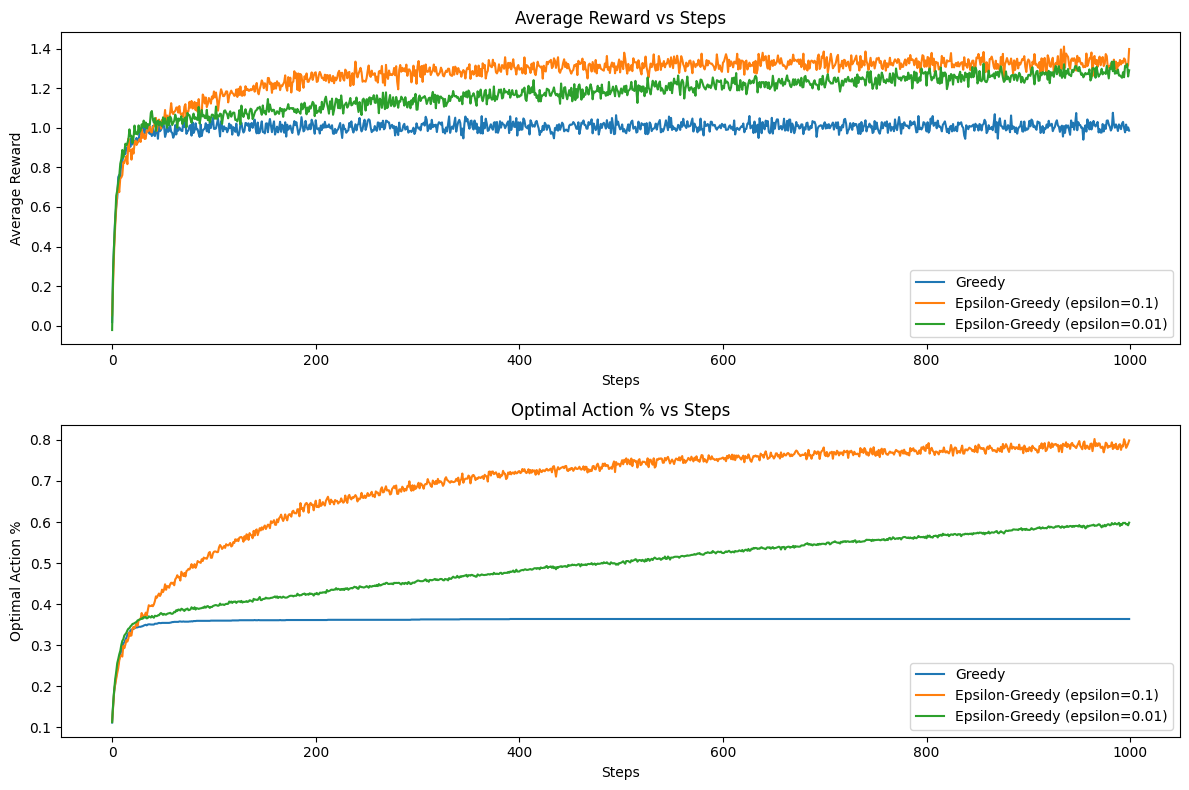

In [15]:

# Run experiment
results = experiment(n_bandits, steps, epsilon, epsilon2)

# Plotting results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(results[0], label="Greedy")
plt.plot(results[1], label=f"Epsilon-Greedy (epsilon={epsilon})")
plt.plot(results[2], label=f"Epsilon-Greedy (epsilon={epsilon2})")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward vs Steps")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(results[3], label="Greedy")
plt.plot(results[4], label=f"Epsilon-Greedy (epsilon={epsilon})")
plt.plot(results[5], label=f"Epsilon-Greedy (epsilon={epsilon2})")
plt.xlabel("Steps")
plt.ylabel("Optimal Action %")
plt.title("Optimal Action % vs Steps")
plt.legend()

plt.tight_layout()
plt.show()


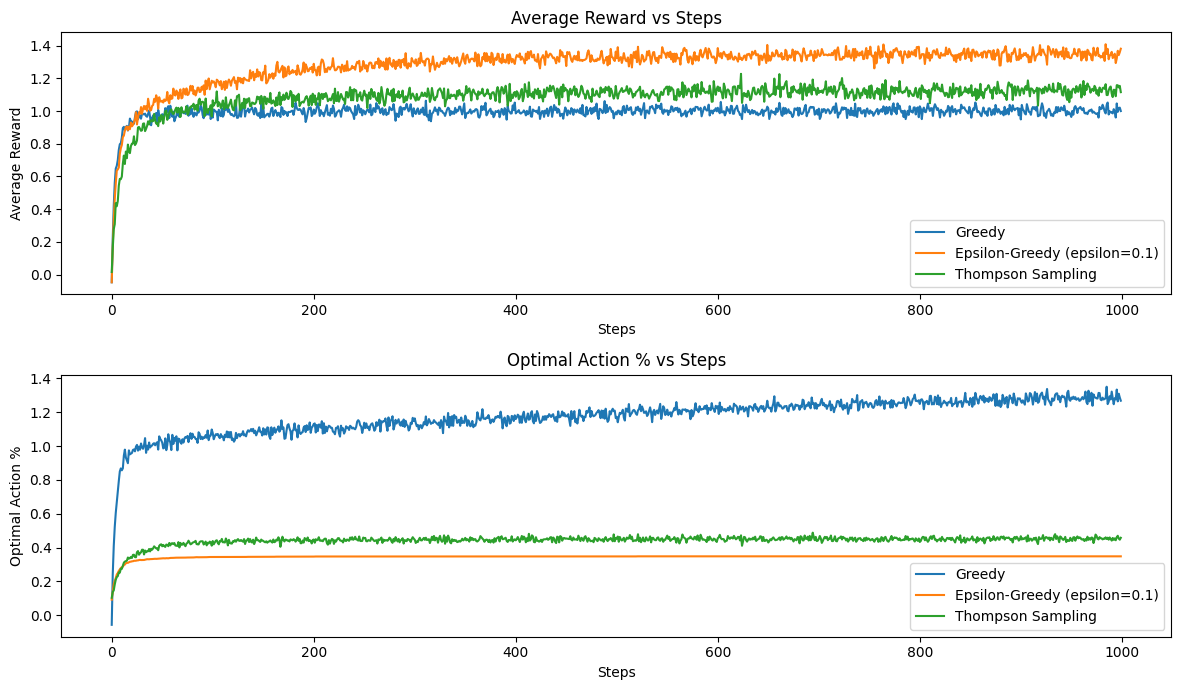

In [9]:

def run_simulation_thompson(bandit, steps):
    q_estimates = np.zeros(bandit.n_arms)  # Mean estimate of rewards
    q_variance = np.ones(bandit.n_arms)  # Variance estimate of rewards
    action_counts = np.zeros(bandit.n_arms)
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    for step in range(steps):
        # Sample from the current Gaussian estimates
        samples = np.random.normal(q_estimates, np.sqrt(q_variance))
        action = np.argmax(samples)

        reward = bandit.get_reward(action)
        rewards[step] = reward

        # Update estimates
        action_counts[action] += 1
        # Incremental formula for variance
        q_variance[action] = ((action_counts[action] - 1) * q_variance[action] +
                              (reward - q_estimates[action]) ** 2) / action_counts[action]
        # Incremental formula for mean
        q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

        if action == bandit.best_action:
            optimal_action_counts[step] = 1

    return rewards, optimal_action_counts

def experiment_thompson(n_bandits, steps):
    rewards_thompson = np.zeros(steps)
    optimal_action_thompson = np.zeros(steps)

    for _ in range(n_bandits):
        bandit = Bandit()
        r_t, oa_t = run_simulation_thompson(bandit, steps)
        rewards_thompson += r_t
        optimal_action_thompson += oa_t

    rewards_thompson /= n_bandits
    optimal_action_thompson /= n_bandits

    return rewards_thompson, optimal_action_thompson

# Run experiment for Thompson Sampling
rewards_thompson, optimal_action_thompson = experiment_thompson(n_bandits, steps)

# Plotting results including Thompson Sampling
plt.figure(figsize=(12, 7))

plt.subplot(2, 1, 1)
plt.plot(results[0], label="Greedy")
plt.plot(results[1], label=f"Epsilon-Greedy (epsilon={epsilon})")
plt.plot(rewards_thompson, label="Thompson Sampling")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward vs Steps")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(results[2], label="Greedy")
plt.plot(results[3], label=f"Epsilon-Greedy (epsilon={epsilon})")
plt.plot(optimal_action_thompson, label="Thompson Sampling")
plt.xlabel("Steps")
plt.ylabel("Optimal Action %")
plt.title("Optimal Action % vs Steps")
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
class SoftmaxBandit:
    def __init__(self, n_arms=10, tau=0.1, initial_value=0):
        self.n_arms = n_arms
        self.tau = tau
        self.q_estimates = np.full(n_arms, initial_value, dtype=float)  # Action value estimates as float
        self.action_counts = np.zeros(n_arms)  # Counts of the number of times each action was taken

    def softmax_probabilities(self):
        """Calculate softmax probabilities for each action."""
        exp_estimates = np.exp(self.q_estimates / self.tau)
        return exp_estimates / np.sum(exp_estimates)

    def select_action(self):
        """Select an action based on softmax probabilities."""
        probabilities = self.softmax_probabilities()
        return np.random.choice(self.n_arms, p=probabilities)

    def update_estimates(self, action, reward, alpha=0.1):
        """Update action value estimates with received reward."""
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])
        self.action_counts[action] += 1

    def simulate(self, steps, true_action_values):
        """Run a simulation for a given number of steps."""
        rewards = np.zeros(steps)
        for step in range(steps):
            action = self.select_action()
            reward = np.random.normal(true_action_values[action], 1)  # Gaussian reward
            self.update_estimates(action, reward)
            rewards[step] = reward
        return rewards


# Simulation Parameters
n_arms = 10
tau = 0.1  # Temperature parameter
steps = 1000  # Number of steps in the simulation

# True action values (q*(a)) from a normal distribution
true_action_values = np.random.normal(0, 1, n_arms)

# Create a softmax bandit instance and run the simulation
bandit = SoftmaxBandit(n_arms=n_arms, tau=tau)
rewards = bandit.simulate(steps, true_action_values)

# Display some results
print("Total Reward: ", np.sum(rewards))
print("Average Reward: ", np.mean(rewards))
print("Action Counts: ", bandit.action_counts)
final_q_estimates = bandit.q_estimates
print("Final q(a) estimates:", final_q_estimates)

Total Reward:  1786.5695069433866
Average Reward:  1.7865695069433867
Action Counts:  [  0.   0.   0.   2. 997.   0.   1.   0.   0.   0.]
Final q(a) estimates: [ 0.          0.          0.          0.22466513  1.44540486  0.
 -0.21636987  0.          0.          0.        ]


In [11]:
class EpsilonGreedyBandit:
    def __init__(self, n_arms=10, epsilon=0.1, initial_value=0, alpha=0.1):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.alpha = alpha
        self.q_estimates = np.full(n_arms, initial_value, dtype=float)  # Initialize action value estimates as float
        self.action_counts = np.zeros(n_arms)  # Counts of the number of times each action was taken

    def select_action(self):
        """Select an action based on the ε-greedy policy."""
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)  # Exploration: choose a random action
        else:
            return np.argmax(self.q_estimates)  # Exploitation: choose the best-known action

    def update_estimates(self, action, reward):
        """Update action value estimates with received reward."""
        self.q_estimates[action] += self.alpha * (reward - self.q_estimates[action])
        self.action_counts[action] += 1

    def simulate(self, steps, true_action_values):
        """Run a simulation for a given number of steps."""
        for step in range(steps):
            action = self.select_action()
            reward = np.random.normal(true_action_values[action], 1)  # Gaussian reward
            self.update_estimates(action, reward)
        return np.sum(self.q_estimates)  # Return the sum of the rewards for analysis


# Simulation Parameters for ε-greedy
epsilon = 0.1  # Exploration probability

# Create an ε-greedy bandit instance and run the simulation
epsilon_bandit = EpsilonGreedyBandit(n_arms=n_arms, epsilon=epsilon)
epsilon_rewards = epsilon_bandit.simulate(steps, true_action_values)

# Display some results
print("Total Reward: ", np.sum(epsilon_rewards))
print("Average Reward: ", np.mean(epsilon_rewards))
print("Action Counts: ", epsilon_bandit.action_counts)
final_q_estimates = epsilon_bandit.q_estimates
print("Final q(a) estimates:", final_q_estimates)


Total Reward:  4.122828077527148
Average Reward:  4.122828077527148
Action Counts:  [638.   6.  15.  13. 286.  12.  12.   6.   6.   6.]
Final q(a) estimates: [ 0.7654235   0.37656602 -0.06365777  0.66292319  1.83116255  1.05884686
 -0.58514027  0.52136057 -0.33884183 -0.10581476]


In [ ]:
true_action_values


array([ 2.12642798,  0.7282873 ,  0.53917082, -0.16680313, -0.85575382,
        0.24336889,  0.09736113,  0.36885183, -0.84653872,  0.56651932])

In [ ]:
final_softmax_probabilities = bandit.softmax_probabilities()
print("Final Softmax Probabilities:", final_softmax_probabilities)

Final Softmax Probabilities: [9.99999958e-01 2.50238069e-09 4.85908559e-10 4.61206864e-10
 1.37309298e-10 8.17977486e-10 2.61817782e-09 2.91866139e-08
 2.53472924e-10 5.74422339e-09]
